## <center><font color='green'> Explainable AI (XAI) - Random Forest Regressor [SHAP]

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import shap 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

#### <font color='purple'> Load dataset  

In [5]:
dataset = pd.read_csv("dataset/neonate_dataset.csv")

In [6]:
dataset.columns

Index(['GENDER', 'ETHNICITY', 'DATEEVENTS', 'DW10_COUNT', 'D10W_SUM',
       'D10W_MEAN', 'URINE_COUNT', 'URINE_SUM', 'URINE_AVG',
       'MICROBIOLOGY_TEST', 'NEGATIVE_RESULT', 'PRESCRIPTIONS', 'BIRTH_WEIGHT',
       'HEAD_CIRC', 'BANDS', 'MONOs', 'EOSINOPHILS', 'NEUTS', 'LYMPHS',
       'PLATELET', 'LOS', 'bpCuffDiastolic_mean', 'bpCuffDiastolic_max',
       'bpCuffDiastolic_min', 'bpCuffDiastolic_std', 'bpCuffDiastolic_var',
       'bpCuffMean_mean', 'bpCuffMean_max', 'bpCuffMean_min', 'bpCuffMean_std',
       'bpCuffMean_var', 'bpCuffSystolic_mean', 'bpCuffSystolic_max',
       'bpCuffSystolic_min', 'bpCuffSystolic_std', 'bpCuffSystolic_var',
       'glucometer_mean', 'glucometer_max', 'glucometer_min', 'glucometer_std',
       'glucometer_var', 'heartRate_mean', 'heartRate_max', 'heartRate_min',
       'heartRate_std', 'heartRate_var', 'hrAlarmHigh_mean', 'hrAlarmHigh_max',
       'hrAlarmHigh_min', 'hrAlarmHigh_std', 'hrAlarmHigh_var',
       'hrAlarmLow_mean', 'hrAlarmLow_max', 

In [7]:
dataset.fillna(method="ffill", inplace=True)
y = dataset['LOS']
X = dataset.drop(['LOS'], axis=1)

In [8]:
selected_features_classification = [
     'temperature_mean',
     'respRate_std',
     'skinTemperature_std',
     'skinTemperature_var',
     'sao2_std',
     'heartRate_mean',
     'respRate_mean',
     'skinTemperature_mean',
     'bpCuffDiastolic_std',
     'BIRTH_WEIGHT',
     'bpCuffSystolic_mean',
     'bpCuffDiastolic_mean',
     'sao2_mean',
     'temperature_std',
     'temperature_var',
     'PLATELET',
     'D10W_MEAN', 'ADMISSION_LOCATION', 'INSURANCE', 'GESTATION', 'WHITE_BLOOD', 
     'DATEEVENTS', 'DW10_COUNT', 'PRESCRIPTIONS', 'HEAD_CIRC'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [10]:
X_train_fs = X_train[selected_features_classification][:]
X_test_fs = X_test[selected_features_classification][:]

In [11]:
X_train_fs.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'ADMISSION_LOCATION': 'Admission Location',
           'INSURANCE': 'Insurance',
           'GESTATION': 'Gestational Age',     
           'DATEEVENTS': 'Date Events Count',  
           'WHITE_BLOOD': 'White Blood Count',  
           'PRESCRIPTIONS': 'Prescriptions Count',
           'HEAD_CIRC': 'Head Circumference',
           'D10W_MEAN': 'D10W Amount (mean)', 
           'DW10_COUNT': 'D10W Count'}, axis=1, inplace=True)

In [12]:
X_test_fs.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'ADMISSION_LOCATION': 'Admission Location',
           'INSURANCE': 'Insurance',
           'GESTATION': 'Gestational Age',     
           'DATEEVENTS': 'Date Events Count',  
           'WHITE_BLOOD': 'White Blood Count',  
           'PRESCRIPTIONS': 'Prescriptions Count',
           'HEAD_CIRC': 'Head Circumference',
           'D10W_MEAN': 'D10W Amount (mean)', 
           'DW10_COUNT': 'D10W Count'}, axis=1, inplace=True)

#### <font color='purple'> Model and Fit

In [13]:
model_rf = RandomForestRegressor(n_estimators = 200, max_depth = 8)
model_cat = CatBoostRegressor(learning_rate=0.03, depth=5)

In [14]:
model_rf.fit(X_train_fs, y_train)
model_cat.fit(X_train_fs, y_train)

0:	learn: 26.3485287	total: 145ms	remaining: 2m 24s
1:	learn: 25.8713690	total: 146ms	remaining: 1m 12s
2:	learn: 25.4399702	total: 147ms	remaining: 49s
3:	learn: 24.9934135	total: 149ms	remaining: 37s
4:	learn: 24.6212289	total: 150ms	remaining: 29.8s
5:	learn: 24.2275992	total: 151ms	remaining: 25s
6:	learn: 23.8612470	total: 152ms	remaining: 21.6s
7:	learn: 23.4854433	total: 153ms	remaining: 19s
8:	learn: 23.1751801	total: 155ms	remaining: 17s
9:	learn: 22.8274627	total: 156ms	remaining: 15.4s
10:	learn: 22.4715985	total: 157ms	remaining: 14.1s
11:	learn: 22.1365671	total: 159ms	remaining: 13.1s
12:	learn: 21.8317933	total: 160ms	remaining: 12.1s
13:	learn: 21.5558714	total: 161ms	remaining: 11.3s
14:	learn: 21.2568209	total: 162ms	remaining: 10.7s
15:	learn: 20.9558172	total: 164ms	remaining: 10.1s
16:	learn: 20.6769604	total: 165ms	remaining: 9.54s
17:	learn: 20.3929650	total: 166ms	remaining: 9.07s
18:	learn: 20.1432546	total: 167ms	remaining: 8.65s
19:	learn: 19.9002611	total: 1

270:	learn: 10.8685573	total: 471ms	remaining: 1.27s
271:	learn: 10.8643062	total: 472ms	remaining: 1.26s
272:	learn: 10.8559118	total: 473ms	remaining: 1.26s
273:	learn: 10.8494148	total: 474ms	remaining: 1.26s
274:	learn: 10.8404429	total: 476ms	remaining: 1.25s
275:	learn: 10.8353462	total: 477ms	remaining: 1.25s
276:	learn: 10.8271192	total: 478ms	remaining: 1.25s
277:	learn: 10.8208718	total: 480ms	remaining: 1.25s
278:	learn: 10.8170902	total: 481ms	remaining: 1.24s
279:	learn: 10.8101376	total: 482ms	remaining: 1.24s
280:	learn: 10.8050249	total: 483ms	remaining: 1.24s
281:	learn: 10.7969091	total: 485ms	remaining: 1.23s
282:	learn: 10.7936057	total: 486ms	remaining: 1.23s
283:	learn: 10.7818041	total: 487ms	remaining: 1.23s
284:	learn: 10.7759847	total: 488ms	remaining: 1.23s
285:	learn: 10.7671544	total: 490ms	remaining: 1.22s
286:	learn: 10.7626125	total: 491ms	remaining: 1.22s
287:	learn: 10.7560319	total: 492ms	remaining: 1.22s
288:	learn: 10.7506097	total: 494ms	remaining:

549:	learn: 9.2723474	total: 797ms	remaining: 652ms
550:	learn: 9.2675475	total: 799ms	remaining: 651ms
551:	learn: 9.2587759	total: 800ms	remaining: 649ms
552:	learn: 9.2522588	total: 801ms	remaining: 648ms
553:	learn: 9.2448071	total: 803ms	remaining: 646ms
554:	learn: 9.2388912	total: 804ms	remaining: 645ms
555:	learn: 9.2338625	total: 805ms	remaining: 643ms
556:	learn: 9.2307162	total: 807ms	remaining: 641ms
557:	learn: 9.2248299	total: 808ms	remaining: 640ms
558:	learn: 9.2192043	total: 809ms	remaining: 638ms
559:	learn: 9.2138964	total: 810ms	remaining: 637ms
560:	learn: 9.2104545	total: 812ms	remaining: 635ms
561:	learn: 9.2041346	total: 813ms	remaining: 634ms
562:	learn: 9.1987126	total: 814ms	remaining: 632ms
563:	learn: 9.1910546	total: 815ms	remaining: 630ms
564:	learn: 9.1834298	total: 817ms	remaining: 629ms
565:	learn: 9.1786982	total: 818ms	remaining: 627ms
566:	learn: 9.1728801	total: 819ms	remaining: 625ms
567:	learn: 9.1682089	total: 820ms	remaining: 624ms
568:	learn: 

821:	learn: 7.9984684	total: 1.13s	remaining: 244ms
822:	learn: 7.9934971	total: 1.13s	remaining: 243ms
823:	learn: 7.9908442	total: 1.13s	remaining: 242ms
824:	learn: 7.9892876	total: 1.13s	remaining: 240ms
825:	learn: 7.9862125	total: 1.13s	remaining: 239ms
826:	learn: 7.9832284	total: 1.13s	remaining: 237ms
827:	learn: 7.9789298	total: 1.14s	remaining: 236ms
828:	learn: 7.9732126	total: 1.14s	remaining: 234ms
829:	learn: 7.9691722	total: 1.14s	remaining: 233ms
830:	learn: 7.9659392	total: 1.14s	remaining: 232ms
831:	learn: 7.9625811	total: 1.14s	remaining: 230ms
832:	learn: 7.9566683	total: 1.14s	remaining: 229ms
833:	learn: 7.9540749	total: 1.14s	remaining: 227ms
834:	learn: 7.9512221	total: 1.14s	remaining: 226ms
835:	learn: 7.9471089	total: 1.14s	remaining: 225ms
836:	learn: 7.9420567	total: 1.15s	remaining: 223ms
837:	learn: 7.9394978	total: 1.15s	remaining: 222ms
838:	learn: 7.9381151	total: 1.15s	remaining: 220ms
839:	learn: 7.9361737	total: 1.15s	remaining: 219ms
840:	learn: 

In [15]:
model_rf.score(X_test_fs, y_test)
model_cat.score(X_test_fs, y_test)

0.7851036377810177

### <font color='purple'> Explainability

In [16]:
explainer = shap.TreeExplainer(model_cat)
shap_values = explainer.shap_values(X_test_fs)

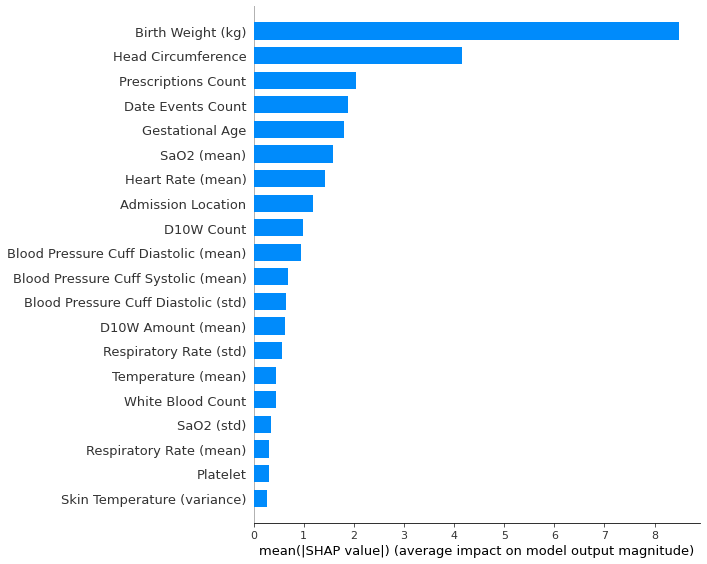

In [17]:
shap.summary_plot(shap_values, X_test_fs, feature_names=X_test_fs.columns, plot_type="bar") ## plot_type = ["dot, violin"]

In [18]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test_fs.loc[[1000]])

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_fs.loc[[1000]])

In [19]:
X_test_fs.loc[1086]

Temperature (mean)                       36.000000
Respiratory Rate (std)                   10.733936
Skin Temperature (std)                    0.048794
Skin Temperature (variance)               0.002381
SaO2 (std)                                4.010855
Heart Rate (mean)                       139.708333
Respiratory Rate (mean)                  52.000000
Skin Temperature (mean)                  36.028571
Blood Pressure Cuff Diastolic (std)       1.000000
Birth Weight (kg)                         3.870000
Blood Pressure Cuff Systolic (mean)      57.333333
Blood Pressure Cuff Diastolic (mean)     34.000000
SaO2 (mean)                              94.000000
Temperature (std)                         0.000000
Temperature (variance)                    0.000000
Platelet                                350.000000
D10W Amount (mean)                        0.000000
Admission Location                        3.000000
Insurance                                 2.000000
Gestational Age                

In [28]:
X_test_fs

,Temperature (mean),Respiratory Rate (std),Skin Temperature (std),Skin Temperature (variance),SaO2 (std),Heart Rate (mean),Respiratory Rate (mean),Skin Temperature (mean),Blood Pressure Cuff Diastolic (std),Birth Weight (kg),...,Platelet,D10W Amount (mean),Admission Location,Insurance,Gestational Age,White Blood Count,Date Events Count,D10W Count,Prescriptions Count,Head Circumference
1086,36.000000,10.733936,0.048794,0.002381,4.010855,139.708333,52.000000,36.028571,1.000000,3.870,...,350.0,0.000000,3,2,37,20.1,0.0,0.0,5.0,33.50
546,36.045833,11.188762,0.181729,0.033025,2.171956,118.000000,33.666667,36.245833,5.590743,1.555,...,373.0,4.269231,1,3,29,9.5,10.0,26.0,7.0,29.75
777,36.268183,11.883416,0.177098,0.031364,1.911066,135.666667,52.458333,36.322727,12.221566,1.460,...,154.0,1.687500,1,3,33,12.0,0.0,24.0,10.0,29.00
1114,36.044445,14.467355,0.292023,0.085278,2.283764,127.416667,48.000000,36.355556,7.501190,3.030,...,468.0,7.784615,3,3,37,30.6,0.0,14.0,0.0,35.00
465,35.979167,17.601054,0.268652,0.072174,1.545798,134.583333,51.166667,36.100000,5.025626,2.175,...,224.0,6.804167,3,3,33,7.2,8.0,24.0,0.0,33.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,35.586956,12.441093,1.220611,1.489892,2.085144,137.541667,48.208333,35.731818,4.991660,1.695,...,271.0,5.508333,1,3,33,13.1,2.0,24.0,7.0,27.00
1732,36.081818,12.900680,0.124578,0.015520,1.062367,144.083333,45.416667,36.186364,3.386247,2.310,...,238.0,6.486957,1,3,33,8.2,0.0,23.0,4.0,33.00
21,35.711765,16.783144,0.305232,0.093166,3.419626,127.608696,54.250000,35.962500,6.723095,2.775,...,347.0,6.692000,3,3,33,12.3,17.0,25.0,0.0,34.00
767,35.700001,14.944713,0.000000,0.000000,1.032796,124.100000,54.700000,36.000000,3.511885,2.915,...,283.0,0.000000,3,3,33,18.1,0.0,0.0,4.0,34.00


In [37]:
model_cat.predict(X_test_fs.loc[[1114]])

array([4.27530469])

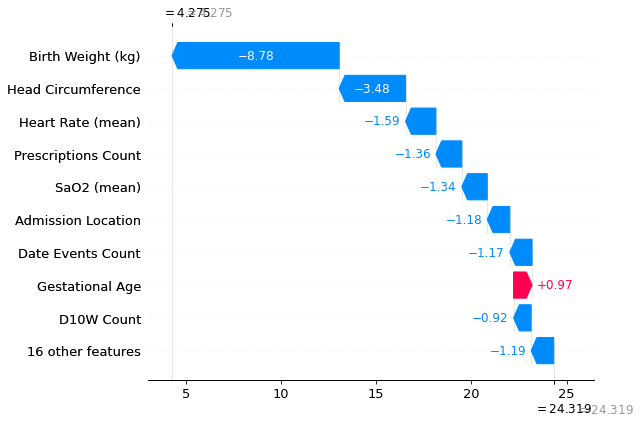

In [40]:
explainer = shap.TreeExplainer(model_cat)
shap_values = explainer.shap_values(X_test_fs.loc[[1114]])

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, 
                                       shap_values[0],  
                                       feature_names=X_test_fs.columns.tolist())


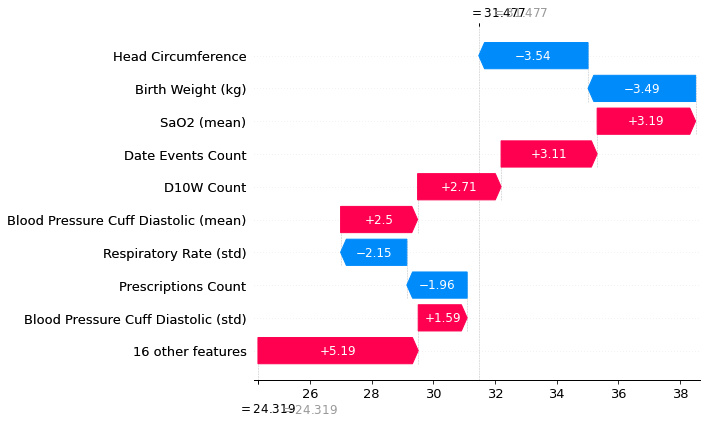

In [22]:
explainer = shap.TreeExplainer(model_cat)
shap_values = explainer.shap_values(X_test_fs.loc[[1000]])

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, 
                                       shap_values[0],  
                                       feature_names=X_test_fs.columns.tolist())

In [23]:
X_test_fs.loc[1000]

Temperature (mean)                       35.704167
Respiratory Rate (std)                   17.382681
Skin Temperature (std)                    0.247890
Skin Temperature (variance)               0.061449
SaO2 (std)                                2.484371
Heart Rate (mean)                       145.875000
Respiratory Rate (mean)                  55.625000
Skin Temperature (mean)                  35.983333
Blood Pressure Cuff Diastolic (std)       9.296697
Birth Weight (kg)                         1.925000
Blood Pressure Cuff Systolic (mean)      53.466667
Blood Pressure Cuff Diastolic (mean)     29.000000
SaO2 (mean)                              93.208333
Temperature (std)                         0.364129
Temperature (variance)                    0.132590
Platelet                                309.000000
D10W Amount (mean)                        2.532931
Admission Location                        1.000000
Insurance                                 3.000000
Gestational Age                

In [34]:
y_test[767]

7.865972222222222

In [35]:
y_test

1086     2.359028
546      7.729167
777     35.938194
1114     4.345139
465      9.669444
          ...    
314     33.659028
1732    10.694444
21       9.754167
767      7.865972
1766    22.141667
Name: LOS, Length: 499, dtype: float64

In [42]:
X_test_fs.loc[1114]

Temperature (mean)                       36.044445
Respiratory Rate (std)                   14.467355
Skin Temperature (std)                    0.292023
Skin Temperature (variance)               0.085278
SaO2 (std)                                2.283764
Heart Rate (mean)                       127.416667
Respiratory Rate (mean)                  48.000000
Skin Temperature (mean)                  36.355556
Blood Pressure Cuff Diastolic (std)       7.501190
Birth Weight (kg)                         3.030000
Blood Pressure Cuff Systolic (mean)      58.166667
Blood Pressure Cuff Diastolic (mean)     36.625000
SaO2 (mean)                              98.791667
Temperature (std)                         0.133334
Temperature (variance)                    0.017778
Platelet                                468.000000
D10W Amount (mean)                        7.784615
Admission Location                        3.000000
Insurance                                 3.000000
Gestational Age                